In [2]:
import numpy as np
import os
import multiprocessing
import pandas as pd
import numpy
dir="../scripts/finaloutput/Malawi_1963_onlyMAF/"
#os.chdir(dir)
file_path =dir+"config.txt"

with open(file_path, "r") as file:
    line = file.readline()
    integer_strings = line.split()
    integers = [int(i) for i in integer_strings]
print(integers)
m=integers[0]
K=integers[1]
V=integers[2]
snp1=integers[3]
snp2=integers[4]
filename = dir + "n_m_z0.dat"

fileobj = open(filename, mode='r')
n_m_z = np.fromfile(fileobj, dtype=np.uint32)
fileobj.close
n_m_z=n_m_z.reshape((m,K))
theta=n_m_z/n_m_z.sum(axis=1)[:,None]
theta=np.around(theta,2)

[1963, 43, 31251, 22300, 30223]


In [3]:
import pickle
filename = dir+"Docs_int_onlySnpgap.dat"
fileobj = open(filename, mode='r')
Docs_1 = np.fromfile(fileobj, dtype=np.int16)
fileobj.close
with open(dir+'Docs_col_name.pkl', 'rb') as f:
        Docs_col_name=pickle.load(f)
f.close();

Docs_1=Docs_1.reshape(m,V)
#data=pd.DataFrame(Docs_1,columns=Docs_col_name)
#data=pd.DataFrame(Docs_1[:,0:10000],columns=Docs_col_name[0:10000])
#data.to_csv(dir+'data.csv',index=False) 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
def plot_prop_major(samplenum):
    readcount=Docs_1[samplenum]
    total=0
    step=2;
    prop1=[]
    prop2=[]
    snp_num1=[]
    snp_num2=[]
    count=1;
    n_count=0;
    cal=0
    for i in range(0,snp1,step):
        snp_num1.append(count)
        snp_num2.append(count)
        count+=1;
        total=total+np.sum(readcount[i:i+step])
        #if(readcount[i]/total>0 and readcount[i]/total<1):
        #    print(i,readcount[i]/total,total,readcount[i],n_count)
        n_count+=1;
        #if(readcount[i]/total>0.05 and readcount[i]/total<0.95):
        if(1):
            a=readcount[i]/total
            b=np.sum(readcount[i+1:i+step])/total
       
            if(a<b):
                if(a!=0 and (not math.isnan(a))):
                    prop1.append(a)
            else:
                if(b!=0 and (not math.isnan(b))):
                    prop1.append(b)
        total=0
    step=3;
    for i in range(snp1,snp2,step):
        snp_num1.append(count)
        snp_num2.append(count)
        count+=1;
        total=total+np.sum(readcount[i:i+step])
        #if(readcount[i]/total>0.05 and readcount[i]/total<0.95):
        if(1):
            a=readcount[i]/total
            b=np.sum(readcount[i+1:i+step])/total
            if(a<b):
                if(a!=0 and (not math.isnan(a))):

                    prop1.append(a)
            else:
                if(b!=0 and (not math.isnan(b))):
                    prop1.append(b)
        total=0
        
    step=4;
    for i in range(snp2,len(Docs_col_name),step):
        snp_num1.append(count)
        snp_num2.append(count)
        count+=1;
        total=total+np.sum(readcount[i:i+step])
        #if(readcount[i]/total>0.05 and readcount[i]/total<0.95):
        if(1):
            a=readcount[i]/total
            b=np.sum(readcount[i+1:i+step])/total
            if(a<b):
                if(a!=0 and (not math.isnan(a))):
                    if(np.sum(Docs_1[:,i]>0)<60 and np.sum(Docs_1[:,i]>0)>50):
                        #print(Docs_col_name[i])
                        cal+=1
                    prop1.append(a)
            else:
                if(b!=0 and (not math.isnan(b))):
  
                    prop1.append(b)
        total=0
        
    data, bins = np.histogram(prop1, bins=10)
    max_count_bin = np.argmax(data)

    max_count = data[max_count_bin]
    

    # Plot histogram for reference
    histogram = sns.histplot(prop1, bins=10, )
    mode=stats.mode(np.around(prop1,2))
    #data, bins, _ = plt.hist(prop1, bins=10,)
    
    bin_index = np.argsort(data)[-1:][::-1]
    
    freq=[]
    if(data[bin_index]>50):  #Malawi 325
        if(bin_index>0):
            freq.append(bins[bin_index-1])
            #if(bin_index>1):
            #    freq.append(bins[bin_index-2])
        if(bin_index<len(data)-1):
            freq.append(bins[bin_index+1])
            #if(bin_index<len(data)-2):
            #    freq.append(bins[bin_index+2])
        freq.append(bins[bin_index])
        
        m=np.mean(freq)
    else:
        m= 0
    
    plt.xlabel("Minor proportion", labelpad=20,fontsize=16)
    plt.ylabel("Frequency", labelpad=20,fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.tight_layout()
    plt.savefig('Minor_prop.png', dpi=300, transparent=True, bbox_inches='tight')
    #plt.show()
    
    print(cal)
    return mode[0][0],max_count,m
    
    

0
0.1 505 0.09839572192513368


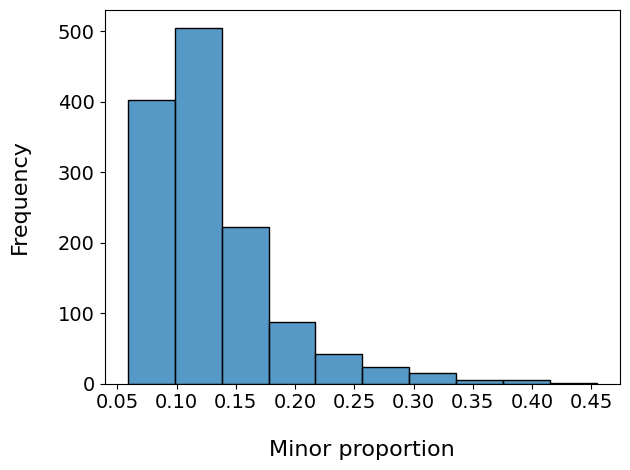

In [12]:
import warnings

#Disable all warnings

warnings.filterwarnings("ignore") 
m,c,mean=plot_prop_major(972)
print(m,c,mean)